# link to documentation
https://macrobond.github.io/macrobond-data-api/#macrobond_data_api.get_unified_series

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! python -m pip install macrobond-data-api

In [5]:
import macrobond_data_api as mda
from macrobond_data_api.web import WebClient

In [10]:
client_id = "webapi_im@orchard-street.co.uk"
client_secret = "hury}atemoguhupyc5nez_5"

with WebClient(client_id, client_secret) as api:
    series = api.get_unified_series("gblama10086","gblama10085", 'gblama10087', 'gblama10088', 'gblama10089').to_pd_data_frame()

series_df = (series)

In [11]:
series_df

,date,gblama10086,gblama10085,gblama10087,gblama10088,gblama10089
0,2014-07-01,1005437.0,476890.0,758647.0,546028.0,886058.0
1,2014-08-01,1010564.0,478977.0,762409.0,547737.0,889079.0
2,2014-09-01,1015117.0,480430.0,764899.0,549174.0,891115.0
3,2014-10-01,1018671.0,480746.0,766717.0,550197.0,893214.0
4,2014-11-01,1024078.0,483265.0,769643.0,552502.0,897653.0
...,...,...,...,...,...,...
101,2022-12-01,1219284.0,549524.0,887698.0,619337.0,1014391.0
102,2023-01-01,1221722.0,550500.0,889436.0,621080.0,1017305.0
103,2023-02-01,1223359.0,550519.0,891865.0,622341.0,1019681.0
104,2023-03-01,1222751.0,549295.0,894181.0,623086.0,1021445.0


In [12]:
type(series_df)

pandas.core.frame.DataFrame

### Grid creation

In [1]:
R = 10
X = int(R) # R is the radius
coord_list = []
for x in range(-X,X+1):
    Y = int((R*R-x*x)**0.5) # bound for y given x
    for y in range(-Y,Y+1):
        coord_list.append([x,y])

In [11]:
df = pd.DataFrame(coord_list)

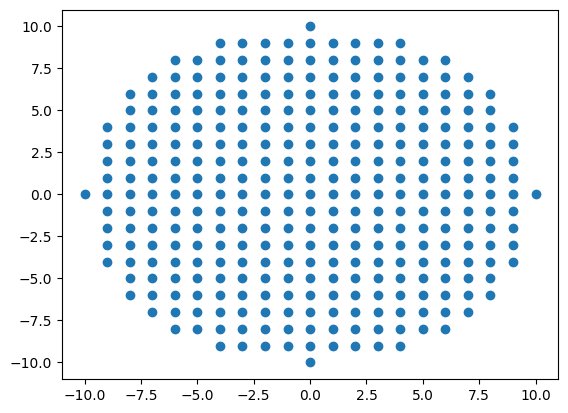

In [12]:
plt.scatter(df[0], df[1])

In [13]:
top_left = [52.692947, -1.219511]
top_right = [52.692712, -1.047477]
bottom_right = [52.580920, -1.051782]
bottom_left = [52.582053, -1.218993]

In [21]:
all_bounds = np.array([top_left, top_right, bottom_left, bottom_right])
all_bounds.shape

(4, 2)

In [29]:
df_bounds = pd.DataFrame(all_bounds)
df_bounds

,0,1
0,52.692947,-1.219511
1,52.692712,-1.047477
2,52.582053,-1.218993
3,52.580920,-1.051782


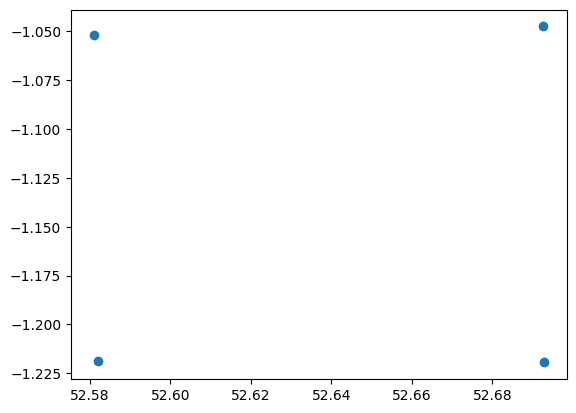

In [28]:
plt.scatter(df_bounds[0], df_bounds[1])

In [46]:
# 555m ~ 0.005 on lat/lon metric
#500m ~ 0.0045 on lat/lon metric

step = 0.0045

num_points_lat = abs(round((top_left[0]-bottom_right[0]) / step))
num_points_lon = abs(round((top_left[1]-bottom_right[1]) / step))

height = np.linspace(top_left[0], bottom_right[0], num_points_lat )
width = np.linspace(top_left[1], bottom_right[1], num_points_lat )

In [60]:
np.array([width for i in height])

array([[-1.219511  , -1.21252229, -1.20553358, -1.19854488, -1.19155617,
        -1.18456746, -1.17757875, -1.17059004, -1.16360133, -1.15661262,
        -1.14962392, -1.14263521, -1.1356465 , -1.12865779, -1.12166908,
        -1.11468038, -1.10769167, -1.10070296, -1.09371425, -1.08672554,
        -1.07973683, -1.07274812, -1.06575942, -1.05877071, -1.051782  ],
       [-1.219511  , -1.21252229, -1.20553358, -1.19854488, -1.19155617,
        -1.18456746, -1.17757875, -1.17059004, -1.16360133, -1.15661262,
        -1.14962392, -1.14263521, -1.1356465 , -1.12865779, -1.12166908,
        -1.11468038, -1.10769167, -1.10070296, -1.09371425, -1.08672554,
        -1.07973683, -1.07274812, -1.06575942, -1.05877071, -1.051782  ],
       [-1.219511  , -1.21252229, -1.20553358, -1.19854488, -1.19155617,
        -1.18456746, -1.17757875, -1.17059004, -1.16360133, -1.15661262,
        -1.14962392, -1.14263521, -1.1356465 , -1.12865779, -1.12166908,
        -1.11468038, -1.10769167, -1.10070296, -1

### Shapefile Tests

In [61]:
pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 5.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 4.6 MB/s eta 0:00:0000:0100:01m
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pwd

/home/willbanny/code/willbanny/Location-Analysis/macrobond


In [6]:
import geopandas as gpd
from osgeo import gdal

gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')
gdf = gpd.read_file("/home/willbanny/code/willbanny/Location-Analysis/raw_data/district_borough_unitary_region.shp", SHAPE_RESTORE_SHX="yes")

gdf.head()

ModuleNotFoundError: No module named 'osgeo'